# irisの分類問題
3種類のアヤメをガクと花弁の大きさデータを使って分類する
<img src="https://miro.medium.com/max/700/0*Uw37vrrKzeEWahdB" width="60%">
<img src="https://mk0setscholarsn9sko6.kinstacdn.com/wp-content/uploads/2020/01/iris-1600x1200.png" width="60%">


In [1]:
#tensorflow バージョン1に変更する必要あり
#2021.08.12から仕様が変更された

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


## irisデータの読み込み

In [2]:
import  numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets #sklean.datasetsを使用

#load_iris関数
#辞書型の変数でデータが渡される
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### 問題
分類結果を可視化するため、四つの変数のうち二つを用いて学習を行おう  


**必要なこと**
*   ２つのデータを取り出しx_dataとする
*   x_dataを正規化する
*   正解データをone-hot表現に変換してy_dataとする
*   データをtrainingとtestに分割



In [3]:
#辞書型の変数では大括弧[]で名前を呼ぶとデータを参照できる
iris_data = iris['data']
print(iris_data.shape)
iris_target = iris['target']
print(iris_target.shape)

(150, 4)
(150,)


#### 2つのデータを取り出しx_data作成

In [4]:
#iris_dataが入力データ(x_data)のもととなる
#ガクの長さ
sepal_len = iris_data[:,0]
#ガクの幅
sepal_wid = iris_data[:,1]
#花弁の長さ
petal_len = iris_data[:,2]
#花弁の幅
petal_wid = iris_data[:,3]
print(sepal_len.shape) # データがベクトルに変換されている

(150,)


In [5]:
#データをまとめてx_dataにする
#x_dataの形は(150, 2)にする必要がある
x_data = np.hstack((sepal_len.reshape(-1,1),sepal_wid.reshape(-1,1)))
print(x_data.shape)

(150, 2)


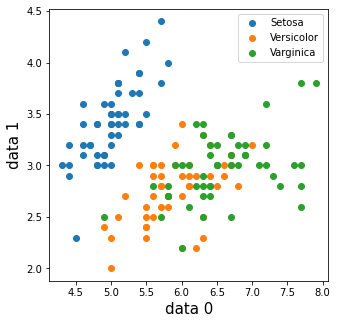

In [6]:
#x_dataを可視化してみよう
labels = ['Setosa','Versicolor','Varginica']
plt.figure(figsize=(5,5))
for i in np.unique(iris_target):
  plt.scatter(x_data[iris_target==i,0],x_data[iris_target==i,1],label=labels[i])
plt.xlabel('data 0',fontsize=15)
plt.ylabel('data 1',fontsize=15)
plt.legend(loc='upper right')
plt.show()

In [7]:
#x_dataを作ったら後のプログラムのために実行
x_data_raw = np.copy(x_data)

#### x_dataのゼロ平均正規化

In [10]:
#x_dataの縦方向平均値を求めてxdata_meanとする
x_data_mean = x_data.mean(axis=0)
#x_dataの縦方向標準偏差を求めてxdata_stdとする
x_data_std = x_data.std(axis=0)

#(data-mean)/stdでゼロ平均正規化
x_data = (x_data - x_data_mean) / x_data_std

print('x_dataの平均')
print(x_data.mean(axis = 0)) #平均がほぼ0になっているか確認
print('\nx_dataの標準偏差')
print(x_data.std(axis = 0)) #標準偏差が1になっているか確認

x_dataの平均
[1.40258175e-16 1.09171931e-17]

x_dataの標準偏差
[1. 1.]


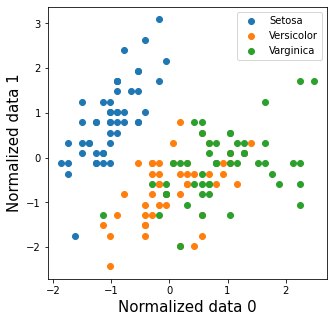

In [11]:
#正規化したデータを可視化してみよう
labels = ['Setosa','Versicolor','Varginica']
plt.figure(figsize=(5,5))
for i in np.unique(iris_target):
  plt.scatter(x_data[iris_target==i,0],x_data[iris_target==i,1],label=labels[i])
plt.xlabel('Normalized data 0',fontsize=15)
plt.ylabel('Normalized data 1',fontsize=15)
plt.legend(loc='upper right')
plt.show()

#### y_data(one-hot data)の作成

In [ ]:
#iris_targetがy_dataのもと(ordinal data)となる

#one-hot表現に変換
y_data = np.eye(3)[iris_target]
print(y_data)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

#### データの分割
機械学習をする際にはデータを

*   トレーニングデータ
*   テストデータ

に分割する必要がある。  
全てのデータを学習に用いると過学習が起きていても気づくことができない。<br><br>
入力データ(x_data)と正解データ(y_data)を


*   x_train
*   x_test
*   y_train
*   y_test  
に分ける



In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,stratify=y_data)

print('x_trainの形')
print(x_train.shape)
print('\ny_trainの形')
print(y_train.shape)
print('\nx_testの形')
print(x_test.shape)
print('\ny_testの形')
print(y_test.shape)

x_trainの形
(112, 2)

y_trainの形
(112, 3)

x_testの形
(38, 2)

y_testの形
(38, 3)


### 分類器の実装
kerasを使って分類モデルを作成する

モデルの形は自由に決めて良い  
基本的に層を重ねるほど分類精度が高くなるが


*   過学習が起きやすい
*   学習に時間がかかる  
という問題が発生する



### モデル構築

<img src='https://github.com/kaichun789/MachineLeaning_Lesson/blob/main/image/image11.jpg?raw=true' width=70% >

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

iris_model = Sequential([
                         Dense(4,activation='relu',input_shape=(2,)),
                         Dense(3,activation='softmax')],name='iris_model')

iris_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "iris_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


### 損失関数とoptimizerの設定
機械学習では損失を定義する損失関数とその損失を下げるためのアルゴリズムを使う。  <br><br>
**損失関数**  
正解データとモデルから出力された値がどのくらい違うか評価する関数  
正解から離れるほど損失は大きくなるような計算がなされる<br><br>

**optimizer**  
損失を効率よく下げるための様々なアルゴリズム   
損失の山の傾斜をみて損失を下げるためのパラメータ調整を行う

In [ ]:
from keras.optimizers import Adam
iris_model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
#categorical crossentropy
#→分類問題において使用されるloss関数

#Adam
#→現在公開されているoptimizerの中で一番効率よく損失を下げられるoptimizer
#Adamでは様々なパラメータが設定できるが今回はlearning_rateのみ扱う

#learning_rateは一回の学習でどれだけパラメータを更新するか決める値
#小さいと学習に時間がかかるが、大きすぎると発散して計算不可能になる
#Adamにおけるlearning_rateのデフォルト値は0.001

### 学習
epoch数は学習回数  
過学習しない程度に数を指定しよう

In [ ]:
iris_his = iris_model.fit(x_train,y_train,epochs=500,
               validation_split=0.2)
#validation dataは学習に用いられないが学習ごとに精度を検証するために使う
#validation_splitでトレーニングデータの何割をバリデーションに使うか決められる


Train on 89 samples, validate on 23 samples
Epoch 1/500
89/89 [==============================] - 0s 4ms/step - loss: 0.9365 - accuracy: 0.5730 - val_loss: 0.8592 - val_accuracy: 0.6522
Epoch 2/500
89/89 [==============================] - 0s 164us/step - loss: 0.9318 - accuracy: 0.5955 - val_loss: 0.8566 - val_accuracy: 0.6522
Epoch 3/500
89/89 [==============================] - 0s 140us/step - loss: 0.9268 - accuracy: 0.5955 - val_loss: 0.8539 - val_accuracy: 0.6522
Epoch 4/500
89/89 [==============================] - 0s 184us/step - loss: 0.9222 - accuracy: 0.5955 - val_loss: 0.8513 - val_accuracy: 0.6522
Epoch 5/500
89/89 [==============================] - 0s 115us/step - loss: 0.9174 - accuracy: 0.5955 - val_loss: 0.8487 - val_accuracy: 0.6522
Epoch 6/500
89/89 [==============================] - 0s 131us/step - loss: 0.9127 - accuracy: 0.5955 - val_loss: 0.8461 - val_accuracy: 0.6522
Epoch 7/500
89/89 [==============================] - 0s 142us/step - loss: 0.9078 - accuracy: 0.595

### 学習結果

学習経過を見てみる

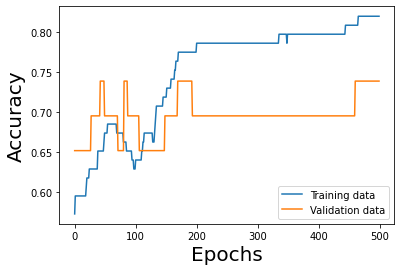

In [ ]:
plt.plot(iris_his.history['accuracy'],label='Training data')
plt.plot(iris_his.history['val_accuracy'],label='Validation data')
plt.legend(loc='lower right')
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.show()

テストデータを使って学習したモデルの精度を検証する  
evaluate(x_test,y_test)  
で精度検証を行うことができる

In [ ]:
iris_loss,iris_acc = iris_model.evaluate(x_test,y_test)
print('test_data accuracy : %.3f'%(iris_acc))

38/38 [==============================] - 0s 204us/step
test_data accuracy : 0.763


数値だけだとわかりにくいので可視化してみよう

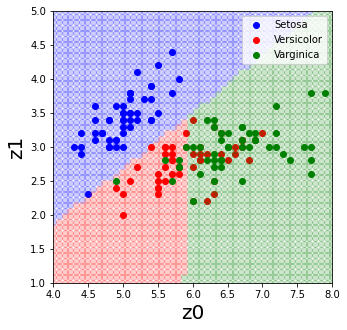

In [ ]:
def show_grid_result(data,model,grid_num,window_xmin,window_xmax,window_ymin,window_ymax):
  grid_xdata = np.linspace(window_xmin,window_xmax,grid_num)
  grid_ydata = np.linspace(window_ymin,window_ymax,grid_num)
  xx,yy = np.meshgrid(grid_xdata,grid_ydata)
  grid_data = np.hstack((xx.reshape(-1,1),yy.reshape(-1,1)))
  grid_data_n = (grid_data-data.mean(axis=0))/data.std(axis=0)
  grid_pred = np.argmax(model.predict(grid_data_n),axis=1)
  return grid_data,grid_pred

#一辺当たりのグリッド数
grid_num = 50

#表示範囲の設定 データに合わせて調整
window_xmin = 4
window_xmax = 8
window_ymin = 1.
window_ymax = 5.

grid_data,grid_pred = show_grid_result(x_data_raw,iris_model,
                                       grid_num,window_xmin,window_xmax,window_ymin,window_ymax)

plt.figure(figsize=(5,5))
colors = ['blue','red','green']
labels = ['Setosa','Versicolor','Varginica']
for i in range(3):
  plt.scatter(grid_data[grid_pred==i,0],grid_data[grid_pred==i,1],alpha=0.2,color=colors[i])
  plt.scatter(x_data_raw[iris_target==i,0],x_data_raw[iris_target==i,1],color=colors[i],label=labels[i])

plt.xlim(window_xmin,window_xmax)
plt.ylim(window_ymin,window_ymax)
plt.xlabel('z0',fontsize=20)
plt.ylabel('z1',fontsize=20)
plt.legend(loc='upper right')
plt.show()